In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib.inline
sns.set_style('whitegrid')

In [4]:
#Import the data
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#### Kyphosis is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back.

The data represnts a number of patients who had kyphosis.They later had a corective spinal surgery.The dataframe now represents if kyphosis was presnt or absent after the operation

    Age is in months( since the patients are kids)
    Number is number of vertabrae involved in the operation
    Start is the number of the first (top most) vertabrae operated on


<img src = "Kyphosis.PNG">

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


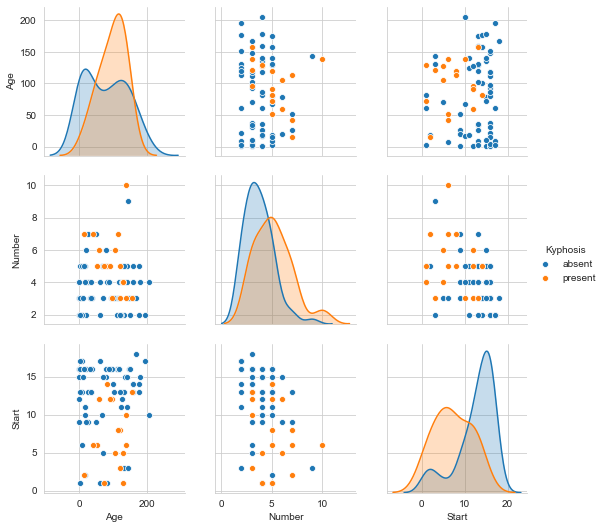

In [11]:
sns.pairplot(df,hue='Kyphosis')

In [13]:
X = df.drop(['Kyphosis'],axis=1)
y = df['Kyphosis']

### Train and Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [16]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier() # Splitting the tree based in 'gini coefficient'
Dtree.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
prediction = Dtree.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
confusion_matrix(y_test,prediction)

array([[14,  5],
       [ 1,  5]], dtype=int64)

In [28]:
accuracy_score(y_test,prediction)

0.76

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.93      0.74      0.82        19
     present       0.50      0.83      0.62         6

    accuracy                           0.76        25
   macro avg       0.72      0.79      0.72        25
weighted avg       0.83      0.76      0.78        25



In [21]:
print(prediction)

['absent' 'present' 'absent' 'absent' 'absent' 'absent' 'present'
 'present' 'present' 'present' 'absent' 'absent' 'absent' 'absent'
 'absent' 'present' 'absent' 'present' 'present' 'present' 'absent'
 'absent' 'absent' 'present' 'absent']


In [22]:
print(y_test)

30     absent
57    present
65     absent
27     absent
14     absent
29     absent
3      absent
12     absent
42     absent
73     absent
76    present
33     absent
1      absent
28     absent
59     absent
21    present
26     absent
2     present
37    present
70     absent
63     absent
74     absent
32     absent
24    present
62     absent
Name: Kyphosis, dtype: object


In [23]:
# Splitting the tree based in 'Entropy'
Dtree = DecisionTreeClassifier(criterion='entropy')
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
prediction1 = Dtree.predict(X_test)

In [25]:
confusion_matrix(y_test,prediction1)

array([[16,  3],
       [ 2,  4]], dtype=int64)

In [26]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

      absent       0.89      0.84      0.86        19
     present       0.57      0.67      0.62         6

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



In [27]:
accuracy_score(y_test,prediction1)

0.8

In [30]:
Dtree.score(X_test,y_test)

0.8

### Tree Visualisation

In [86]:
#Lets visualise the decision tree 


from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

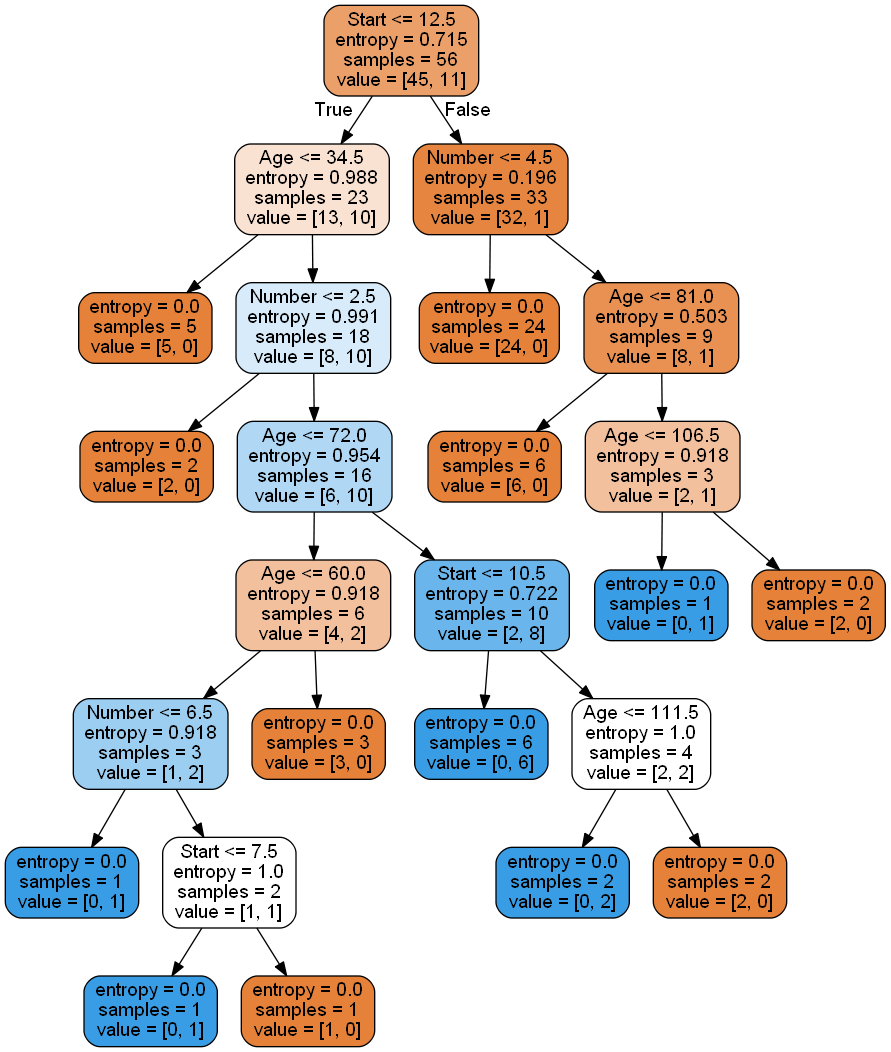

In [87]:
dot_data = StringIO()  
export_graphviz(Dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [67]:
# Lets see how Logistic regression works on this
df1 = pd.read_csv('kyphosis.csv')
df1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [68]:
#Lets convert our target variable into binary outputs
Target_map = {'absent':0,'present':1}

In [69]:
df1['Kyphosis'] = df1['Kyphosis'].map(Target_map)

In [70]:
df1.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [71]:
X = df1.drop(['Kyphosis'],axis=1)
y = df1['Kyphosis']

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [73]:
Scaler = StandardScaler()

In [74]:
X_scaled = Scaler.fit_transform(X)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3)

In [76]:
regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred = regression.predict(X_test)

In [78]:
regression.score(X_train,y_train)

0.8571428571428571

In [79]:
regression.score(X_test,y_test)

0.84

In [80]:
accuracy_score(y_test,pred)

0.84

In [81]:
confusion_matrix(y_test,pred)

array([[20,  1],
       [ 3,  1]], dtype=int64)

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [83]:
y_test

16    0
55    0
12    0
33    0
59    0
22    1
44    0
75    0
47    0
70    0
1     0
37    1
60    1
30    0
15    0
68    0
26    0
35    0
64    0
0     0
28    0
73    0
62    0
56    0
2     1
Name: Kyphosis, dtype: int64

In [84]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

It seems logistic regression works better for this problem statement.

But we cant take it for granted as we have very small set of the data.